# CHSH Violation in Real Time

This notebook tracks the CHSH statistic \(S\) for an ideal Bell pair while measurement shots accumulate. It plots the running estimate against the local (\(S=2\)) and quantum Tsirelson limits and shows the single-party marginals to verify that the setup respects the no-signaling constraint. Use it to experiment with angle choices and see, in real time, how present measurement contexts determine the correlations you observe.

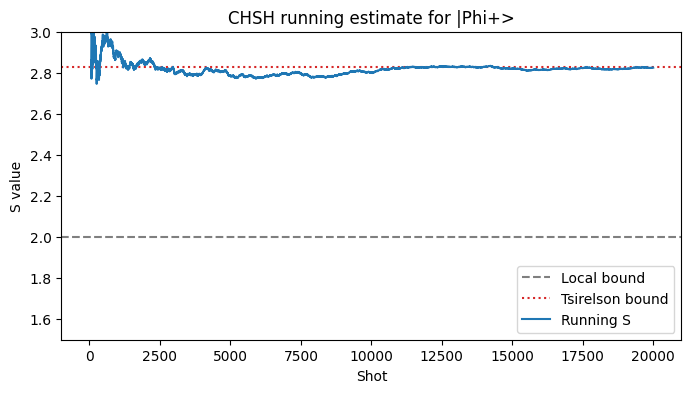

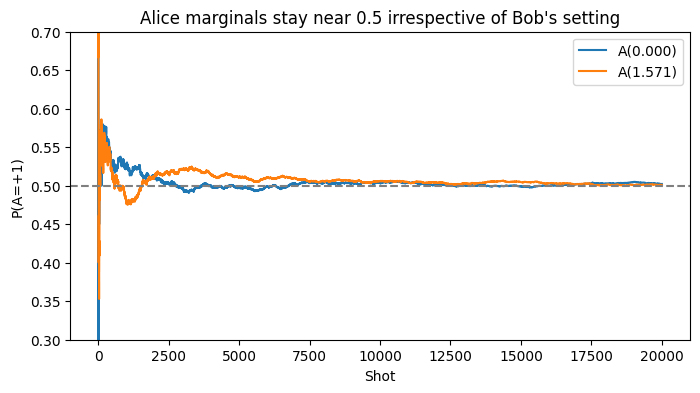

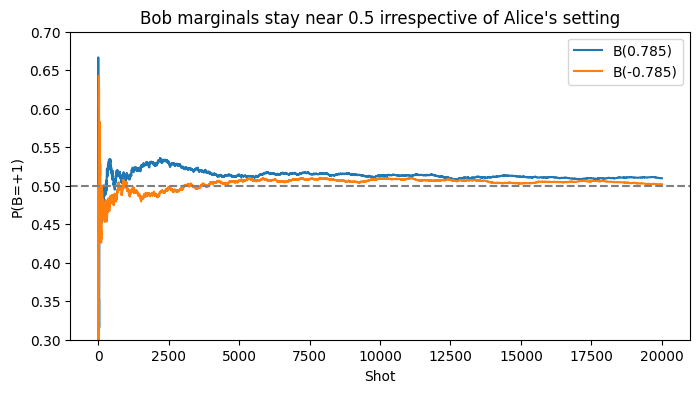

In [3]:
import math
import numpy as np
import matplotlib.pyplot as plt

from eac.simulate import chsh_stream
from eac.states import load_state

angles = ((0.0, math.pi / 2), (math.pi / 4, -math.pi / 4))
shots = 20000
seed = 123
state = load_state()
rng = np.random.default_rng(seed)

records = list(
    chsh_stream(
        state,
        angles,
        shots=shots,
        schedule='cycle',
        rng=rng,
    )
)

shot_axis = []
running_s = []
alice_series = {angle: [] for angle in records[-1]["marginals"]["alice"]}
bob_series = {angle: [] for angle in records[-1]["marginals"]["bob"]}

for rec in records:
    if rec["running_s"] is None:
        continue
    shot_axis.append(rec["shot"])
    running_s.append(rec["running_s"])
    for angle, prob in rec["marginals"]["alice"].items():
        alice_series[angle].append(prob if prob is not None else np.nan)
    for angle, prob in rec["marginals"]["bob"].items():
        bob_series[angle].append(prob if prob is not None else np.nan)

plt.figure(figsize=(8, 4))
plt.axhline(2.0, color='tab:gray', linestyle='--', label='Local bound')
plt.axhline(2 * math.sqrt(2), color='tab:red', linestyle=':', label='Tsirelson bound')
plt.plot(shot_axis, running_s, label='Running S')
plt.xlabel('Shot')
plt.ylabel('S value')
plt.ylim(1.5, 3.0)
plt.legend(loc='lower right')
plt.title('CHSH running estimate for |Phi+>')
plt.show()

plt.figure(figsize=(8, 4))
for angle, series in alice_series.items():
    plt.plot(shot_axis, series, label=f"A({angle:.3f})")
plt.axhline(0.5, color='tab:gray', linestyle='--')
plt.ylim(0.3, 0.7)
plt.xlabel('Shot')
plt.ylabel('P(A=+1)')
plt.title("Alice marginals stay near 0.5 irrespective of Bob's setting")
plt.legend()
plt.show()

plt.figure(figsize=(8, 4))
for angle, series in bob_series.items():
    plt.plot(shot_axis, series, label=f"B({angle:.3f})")
plt.axhline(0.5, color='tab:gray', linestyle='--')
plt.ylim(0.3, 0.7)
plt.xlabel('Shot')
plt.ylabel('P(B=+1)')
plt.title("Bob marginals stay near 0.5 irrespective of Alice's setting")
plt.legend()
plt.show()

## Try your own settings

Change `angles`, `shots`, or `seed` in the previous cell and re-run it.
The entangled constraint is present-time: swap an angle now and the running `S`
trajectory responds immediately.